In [31]:
import numpy as np
import matplotlib.pyplot as plt

#TODO:
#https://share.cocalc.com/share/bb76377ee6823f7155a629e6f072f30d7c0b956f/Project_IsingModel/Project_IsingModel.ipynb?viewer=share
# Exercise 3: Nearest Neighbour algorithm
#See: https://stackoverflow.com/questions/45742199/find-nearest-neighbors-of-a-numpy-array-in-list-of-numpy-arrays-using-euclidian
# Or do manually

%matplotlib inline

normal_latt = lambda shape: np.ones(shape)

def enforce_PBC(lattice):
    nrows, ncols = lattice.shape
    if nrows != 1 and ncols != 1:
        lattice[nrows-1] = lattice[0]
        lattice[:,ncols -1] = lattice[:,0]
    elif nrows == 1:
        lattice[0, -1] = lattice[0, 0]
    elif ncols == 1:
        lattice[-1, 0] = lattice[0, 0]
    return lattice    

def rand_latt(shape, prob=0.5):
    nrows, ncols = shape
    latt = np.random.choice(a=[-1, 1], size=shape, p=[prob, 1-prob])
    return enforce_PBC(latt)

def rand_choose(lattice):
    nrows, ncols = lattice.shape
    indices =  (np.random.randint(0, high=nrows), np.random.randint(0, high=ncols))
    return indices

def flip_spin(lattice, indices):
    i, j = indices
    nrows, ncols = lattice.shape
    lattice[indices] *= -1
    return enforce_PBC(lattice)

def draw(lattice, plotter, size=(25,1), aspect='equal'):
    l, w = size
    fig = plt.figure()
    fig.set_size_inches(l,w)
    plotter.axis('off')
    plotter.imshow(lattice, cmap='cool',interpolation='nearest',aspect=aspect)
    plotter.show()

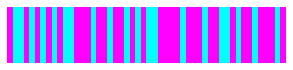

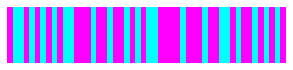

In [32]:
#Test values for rendering ising model in 1d 

# 1 dimensional
nspins = 50
image_size = (5, 20) #This is in inches
image_aspect = 10 #Adjust this with nspins

lattice = rand_latt((1, nspins))
draw(lattice, plt, size=image_size, aspect=image_aspect)
selected_spin = rand_choose(lattice)

flip_spin(lattice, selected_spin)
draw(lattice, plt, size=image_size, aspect=image_aspect)

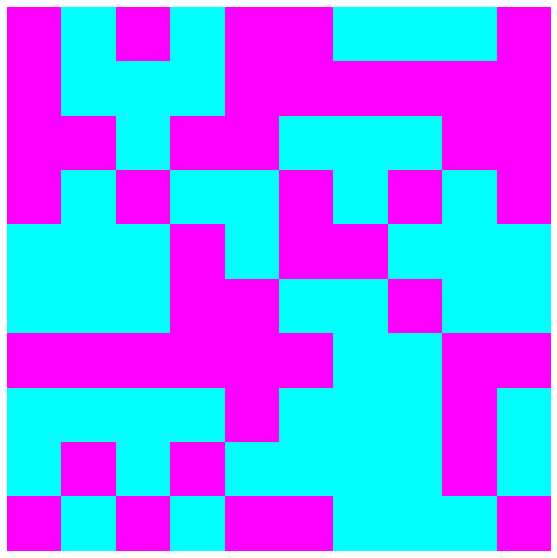

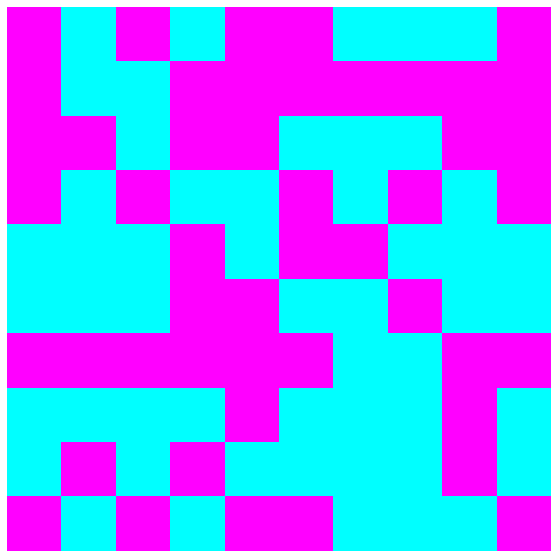

In [37]:
#Test values for rendering ising model in 2d 

# 2 dimensional
spinshape = (10, 10)
image_size = (10, 10) #This is in inches
image_aspect = 1 #Adjust this with nspins

lattice = rand_latt(spinshape)
draw(lattice, plt, size=image_size, aspect=image_aspect)
selected_spin = rand_choose(lattice)

flip_spin(lattice, selected_spin)
draw(lattice, plt, size=image_size, aspect=image_aspect)